<a href="https://colab.research.google.com/github/rtajeong/Kyungnam_univ_M4/blob/main/lab_59_MNIST_keras_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_51_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# f-6-MNIST-keras
- 케라스를 이용한 MNIST

## 데이터 로드

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [10]:
train_images[0].max()   # 8-bit

255

In [5]:
type(train_images), type(train_images[0]), train_images[0].shape

(numpy.ndarray, numpy.ndarray, (28, 28))

In [6]:
type(train_labels), type(train_labels[0]), train_labels[0]

(numpy.ndarray, numpy.uint8, 5)

In [7]:
train_images.shape, train_labels.dtype

((60000, 28, 28), dtype('uint8'))

## MNIST 이미지 확인 및 데이터 전처리

In [ ]:
# train_images[0], train_images[0]/255

<function matplotlib.pyplot.show>

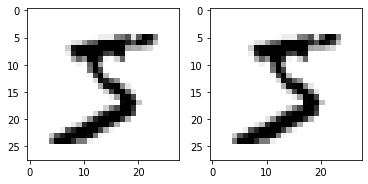

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.subplot(1,2,2)
plt.imshow(train_images[0]/255, cmap=plt.cm.binary)
plt.show

In [12]:
# just for checking
print(type(train_labels), train_labels[:10])
train_images.shape, train_labels.shape

<class 'numpy.ndarray'> [5 0 4 1 9 2 1 3 1 4]


((60000, 28, 28), (60000,))

In [13]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [14]:
train_images.shape, train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [16]:
print(train_labels[:10], type(train_labels), )

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] <class 'numpy.ndarray'>


## MLP(multi-layer perceptron) 로 구현(케라스 사용)

### Single flattened layer

In [48]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28*1))
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape((10000, 28*28*1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [37]:
# a single MLP layer
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape = (28*28*1, )))
model.summary()

model.compile(optimizer= 'rmsprop',             # set up hyperparamers
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=30, batch_size=256, verbose=2)

test_loss, test_acc = model.evaluate(test_images, test_labels) # default batch size=32
print('test_acc = ',test_acc)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
235/235 - 1s - loss: 0.7574 - accuracy: 0.8211
Epoch 2/30
235/235 - 0s - loss: 0.3693 - accuracy: 0.8992
Epoch 3/30
235/235 - 0s - loss: 0.3229 - accuracy: 0.9104
Epoch 4/30
235/235 - 0s - loss: 0.3035 - accuracy: 0.9155
Epoch 5/30
235/235 - 0s - loss: 0.2921 - accuracy: 0.9188
Epoch 6/30
235/235 - 0s - loss: 0.2842 - accuracy: 0.9205
Epoch 7/30
235/235 - 0s - loss: 0.2787 - accuracy: 0.9227
Epoch 8/30
235/235 - 0s - loss: 0.2743 - accuracy: 0.9232
Epoch 9/30
235/235 - 0s - loss: 0.2708 - accuracy: 0.9247
Epoch 10/30
235/235 - 0s - loss: 0.2681 - accuracy: 0.9252
Epoch 11/30
235/235 - 0s - loss: 0.2656 - accuracy: 0.9263
Epoch 

## MLP with hidden layers

In [49]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28*1, ))) # fully-connected
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_28 (Dense)             (None, 100)               10100     
_________________________________________________________________
flatten_8 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [50]:
print(model.input)
print(model.output)
print(model.input_shape)
print(model.output_shape)
model.input.shape

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='dense_27_input'), name='dense_27_input', description="created by layer 'dense_27_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_29/Softmax:0', description="created by layer 'dense_29'")
(None, 784)
(None, 10)


TensorShape([None, 784])

In [51]:
model.compile(optimizer= 'rmsprop',             # set up hyperparamers
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [52]:
model.fit(train_images, train_labels, epochs=30, batch_size=200) 

Epoch 1/30
300/300 [==============================] - 1s 2ms/step - loss: 0.6203 - accuracy: 0.8295
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.1759 - accuracy: 0.9464
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.1170 - accuracy: 0.9656
Epoch 4/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9735
Epoch 5/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0697 - accuracy: 0.9782
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0563 - accuracy: 0.9818
Epoch 7/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0459 - accuracy: 0.9856
Epoch 8/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9886
Epoch 9/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0313 - accuracy: 0.9905
Epoch 10/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0281 - accuracy: 0.9920

In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # default batch size=32
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1322 - accuracy: 0.9792
test_acc =  0.979200005531311


## CNN 모델 생성

In [ ]:
# keras.layers.Conv2D(filters, kernel_size,...)
# - filters: the dimensionality of the output space (the number of output filters).
# - parameter 수: 입력채널수 X 필터폭 X 필터높이 X 출력채널수 
# - bias 도 고려

In [54]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [55]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# print(model.output_shape)

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
print(model.output_shape)

model.summary()   

(None, 10)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)   

In [56]:
# number of parameters
# conv2d_1 : 3*3*1*32 + 32 = 320
# conv2d_2 : 3*3*32*64 + 64 = 18496
# conv2d_3 : 3*3*64*64 + 64 = 36928
# dense_6 : 3*3*64*10 + 10 = 5770

## 훈련

In [57]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [58]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 9s 3ms/step - loss: 0.3911 - accuracy: 0.8766
Epoch 2/3
938/938 [==============================] - 3s 4ms/step - loss: 0.0514 - accuracy: 0.9840
Epoch 3/3
938/938 [==============================] - 3s 4ms/step - loss: 0.0361 - accuracy: 0.9896


In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0391 - accuracy: 0.9862
test_acc =  0.9861999750137329
